In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load and Explore the Data

In [39]:
data = pd.read_csv("force2020_data.csv")

In [40]:
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [41]:
data.describe

<bound method NDFrame.describe of            RHOB         GR  DEPTH_MD      NPHI        PEF         DTC
0      1.884186  80.200851   494.528       NaN  20.915468  161.131180
1      1.889794  79.262886   494.680       NaN  19.383013  160.603470
2      1.896523  74.821999   494.832       NaN  22.591518  160.173615
3      1.891913  72.878922   494.984       NaN  32.191910  160.149429
4      1.880034  71.729141   495.136       NaN  38.495632  160.128342
...         ...        ...       ...       ...        ...         ...
18265  2.630211  19.418915  3271.416  0.187811        NaN         NaN
18266  2.643114  21.444370  3271.568  0.185574        NaN         NaN
18267  2.681300  22.646879  3271.720  0.176074        NaN         NaN
18268  2.738337  22.253584  3271.872  0.174617        NaN         NaN
18269  2.792922  19.829920  3272.024  0.176627        NaN         NaN

[18270 rows x 6 columns]>

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [43]:
data.shape

(18270, 6)

In [44]:
data.isnull().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

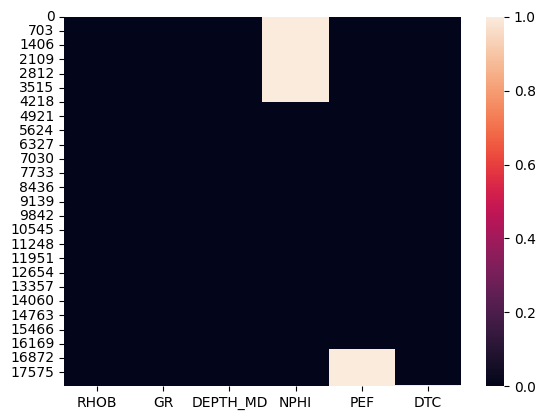

In [45]:
sns.heatmap(data.isna())
plt.show()

In [46]:
num_df = data.select_dtypes(include="number")
cat_df = data.select_dtypes(include="object_")

In [47]:
print("numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)

cat_cols = cat_df.columns.tolist()
print("categorical columns are")
print(cat_cols)

numerical columns are
['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']
categorical columns are
[]


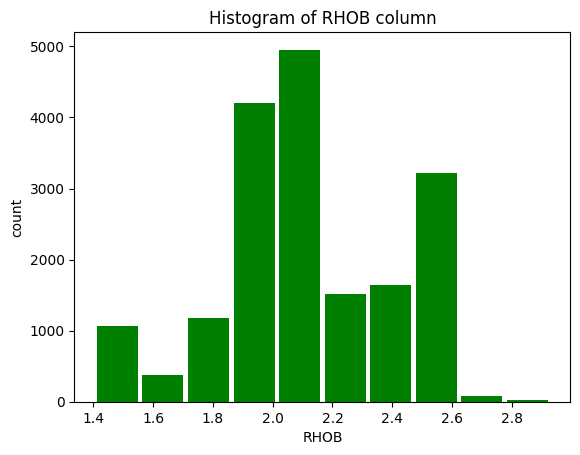

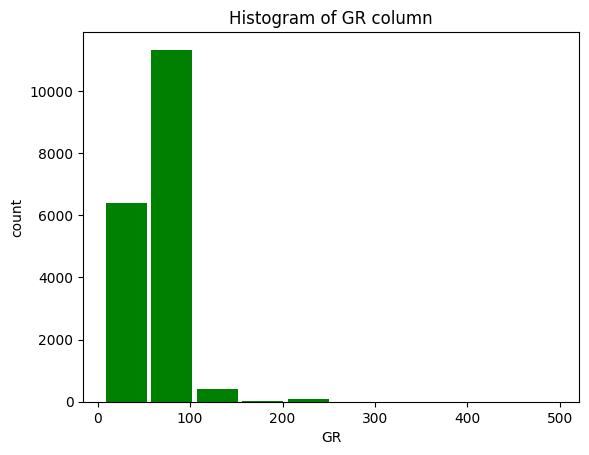

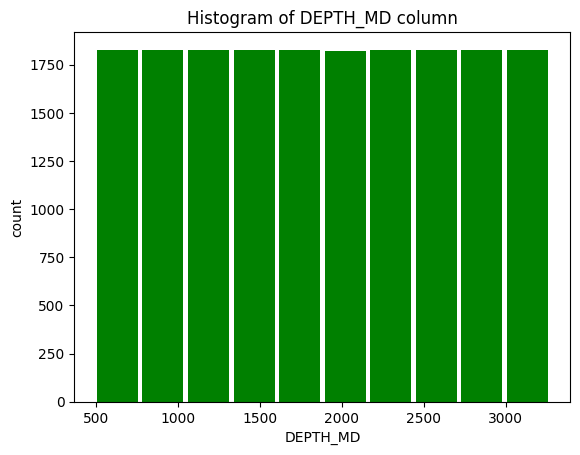

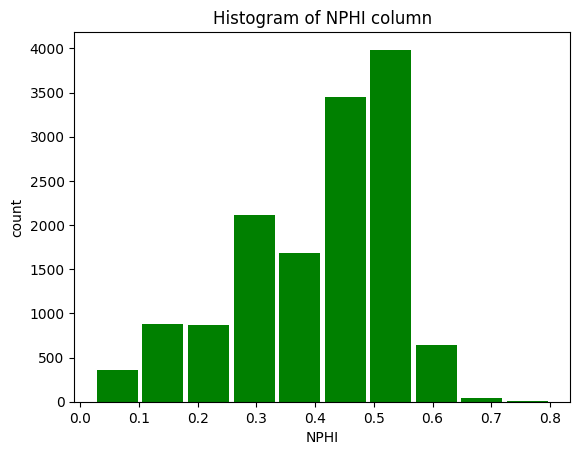

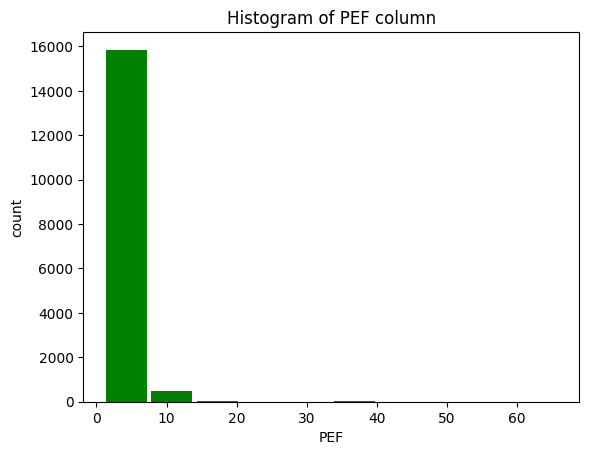

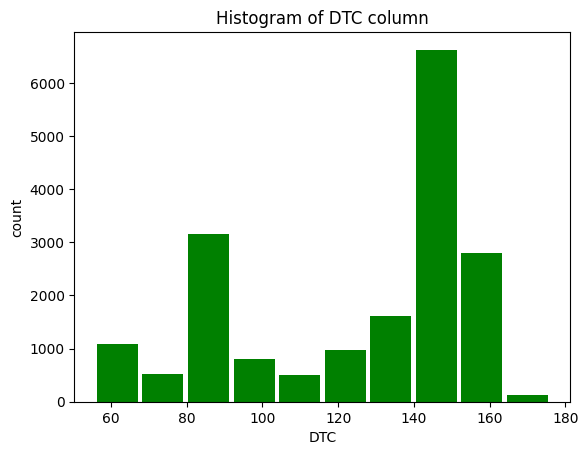

In [48]:
for col in num_cols:
 plt.hist(num_df[col], color='green', rwidth=0.9)
 plt.title("Histogram of {} column".format(col))
 plt.xlabel(col)
 plt.ylabel("count")
 plt.show()

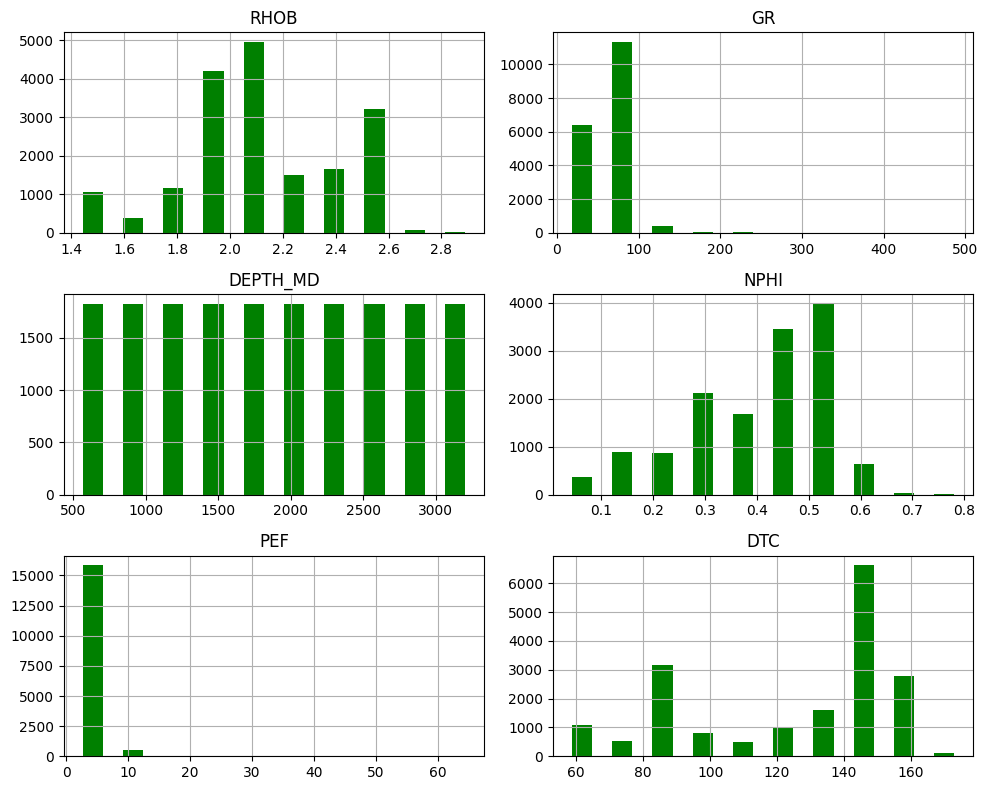

In [49]:
data.hist(figsize=(10, 8), color='green', rwidth=0.5)
plt.tight_layout()
plt.show()

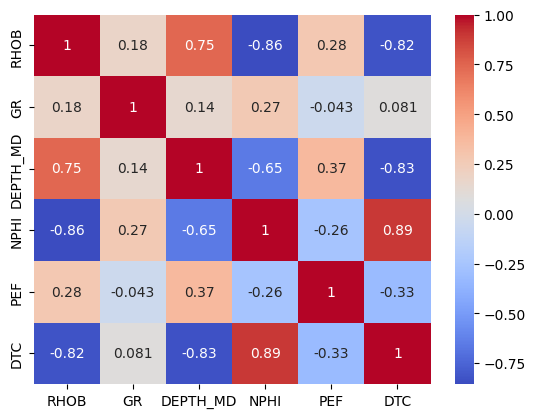

In [50]:
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Step 2: Preprocess the Data 

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features_to_scale = [ 'RHOB','GR', 'DEPTH_MD', 'NPHI' , 'PEF' , 'DTC']

# Apply StandardScaler (mean = 0, standard deviation = 1)
standard_scaler = StandardScaler()
data[features_to_scale] = standard_scaler.fit_transform(data[features_to_scale])

print("Standardized values:\n", data[features_to_scale].head())

# Apply MinMaxScaler (scales values between 0 and 1)
minmax_scaler = MinMaxScaler()
data[features_to_scale] = minmax_scaler.fit_transform(data[features_to_scale])

print("Normalized values:\n", data[features_to_scale].head())

Standardized values:
        RHOB        GR  DEPTH_MD  NPHI        PEF       DTC
0 -0.759999  0.571087 -1.731721   NaN   6.813948  1.176615
1 -0.741163  0.538331 -1.731532   NaN   6.215604  1.159379
2 -0.718560  0.383248 -1.731342   NaN   7.468358  1.145340
3 -0.734045  0.315393 -1.731152   NaN  11.216811  1.144550
4 -0.773944  0.275241 -1.730963   NaN  13.678087  1.143861
Normalized values:
        RHOB        GR  DEPTH_MD  NPHI       PEF       DTC
0  0.314847  0.150172  0.000000   NaN  0.306142  0.876716
1  0.318528  0.148269  0.000055   NaN  0.282573  0.872327
2  0.322946  0.139258  0.000109   NaN  0.331919  0.868752
3  0.319919  0.135315  0.000164   NaN  0.479572  0.868550
4  0.312121  0.132982  0.000219   NaN  0.576522  0.868375


In [52]:
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,0.314847,0.150172,0.000000,NaN,0.306142,0.876716
1,0.318528,0.148269,0.000055,NaN,0.282573,0.872327
2,0.322946,0.139258,0.000109,NaN,0.331919,0.868752
3,0.319919,0.135315,0.000164,NaN,0.479572,0.868550
4,0.312121,0.132982,0.000219,NaN,0.576522,0.868375


# Step 3: Apply Clustering Algorithms

## K-Means Clustering: 

In [53]:
# Fix: Fill missing values with column mean
data = data.fillna(data.mean(numeric_only=True))

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

wcss = []
silhouette_scores = []

# Try K from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

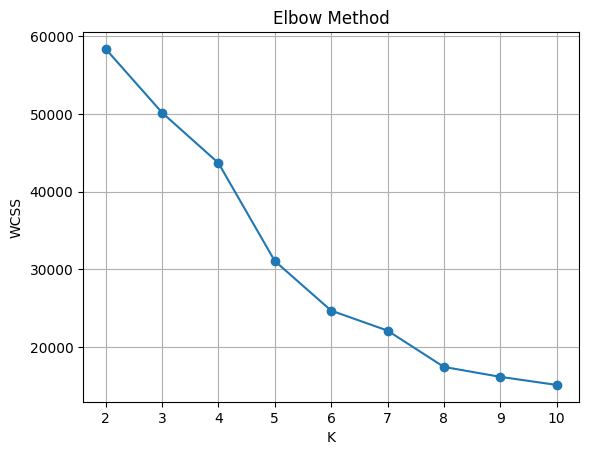

In [54]:
# Plot Elbow Curve
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

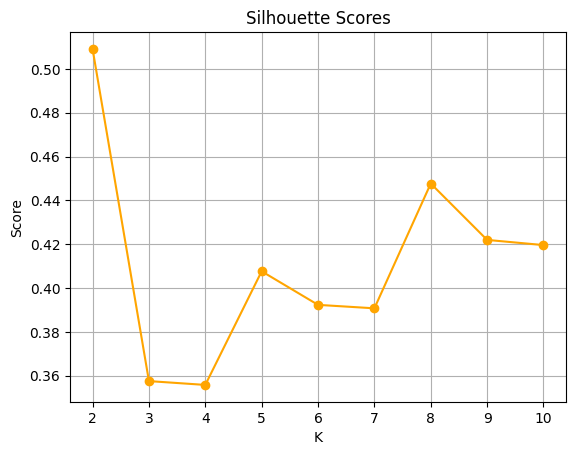

In [55]:
# Plot Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('K')
plt.ylabel('Score')
plt.grid(True)
plt.show()

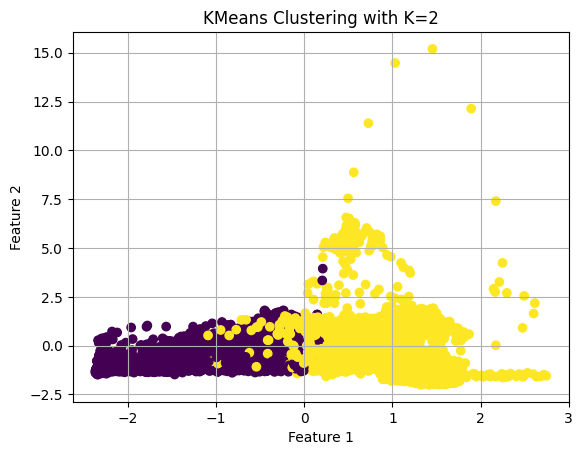

In [61]:
# Visualize clusters (choose any 2 features)
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=best_k)
clusters = kmeans.fit_predict(scaled_data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title(f'KMeans Clustering with K={best_k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## Agglomerative Hierarchical Clustering: 

In [ ]:
# Try different linkage methods
for link in ['ward', 'complete', 'average']:
    model = AgglomerativeClustering(n_clusters=best_k, linkage=link)
    labels = model.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"Linkage: {link}, Silhouette Score: {score}")

    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='rainbow')
    plt.title(f'Agglomerative Clustering ({link})')
    plt.show()
